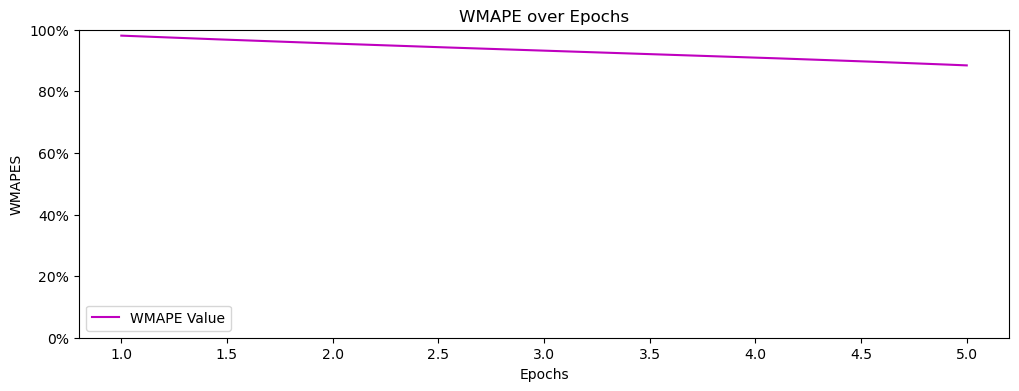

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np 
from scipy.interpolate import make_interp_spline 

with open(f"./Energy_Consumption_Model_WMAPE.txt", "r") as f:
    lines = f.readlines()

epochs = list(range(1, len(lines)+1))
epochs=np.array(epochs)
WMAPES=np.array(lines)

x_new = np.linspace(epochs.min(), epochs.max(), 300) 
spl = make_interp_spline(epochs, WMAPES, k=3)
power_smooth = spl(x_new) 
 
# 绘制光滑曲线
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

# 设置标题和标签
ax.plot(x_new, power_smooth, 'm-', label='WMAPE Value')
ax.set_title('WMAPE over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylim(0, 100)
ax.set_ylabel('WMAPES')
# 在y轴标签中添加百分比符号   
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.legend()

# 显示图表
plt.show()